In [1]:
import os
os.chdir("..")

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from persim import plot_diagrams
from ripser import ripser


from utils.LBPs import LBPExtractor

In [60]:
fake_path = "data/imgs/Fake"
genuine_path = "data/imgs/Real"

fake_images = [405, 603, 623, 653, 672, 1943]
genuine_images = [304, 378, 498, 516, 594]

fake_file_paths = [f"{fake_path}/fake_{img}.jpg" for img in fake_images]
genuine_file_paths = [f"{genuine_path}/real_{img}.jpg" for img in genuine_images]

In [62]:
fake_p = fake_file_paths[-1]
real_p = genuine_file_paths[0]
extractor = LBPExtractor(fake_p)
extractor.compute_lbp()

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 135, 255, ..., 207, 191,   0],
       [  0, 207, 255, ..., 223,  62,   0],
       ...,
       [  0, 241, 241, ...,  64, 251,   0],
       [  0, 241, 241, ...,  68, 251,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(256, 256), dtype=uint8)

In [63]:
two_ones_codes = [3, 6, 12, 24, 48, 96, 192]
pics = {}

for i in two_ones_codes:
    point_cloud = np.array(extractor.extract_point_cloud(i))
    cur_img = ripser(point_cloud)
    pics[i] = cur_img

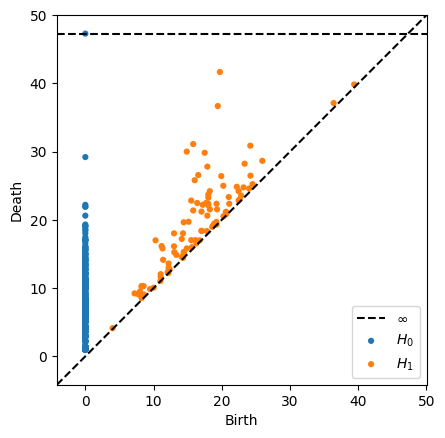

In [67]:
plot_diagrams(pics[12]["dgms"], show = True)